In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from bs4 import BeautifulSoup
import requests



In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [4]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width

In [5]:
table = soup.find_all('table')[0]
print(table)

<table class="wikitable sortable sticky-header-multi sort-under" style="text-align:left;">
<tbody><tr>
<th rowspan="2" scope="col">Rank
</th>
<th rowspan="2" scope="col">Name
</th>
<th rowspan="2" scope="col">Industry
</th>
<th scope="col">Revenue
</th>
<th scope="col">Profit
</th>
<th rowspan="2" scope="col">Employees
</th>
<th rowspan="2" scope="col">Headquarters<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite-bracket">[</span>note 1<span class="cite-bracket">]</span></a></sup>
</th>
<th rowspan="2" scope="col"><a href="/wiki/State-owned_enterprise" title="State-owned enterprise">State-owned</a>
</th>
<th class="unsortable" rowspan="2" scope="col"><abbr title="Reference(s)">Ref.</abbr>
</th></tr>
<tr>
<th colspan="2" scope="col"><small>USD millions</small>
</th></tr>
<tr>
<th scope="col">1
</th>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a></td>
<td><a href="/wiki/Retail" title="Retail">Retail</a></td>
<td style="text-align:center;"><span type

In [6]:
world_title = table.find_all('th')
world_title = [title.text.strip() for title in world_title]

In [7]:
world_title

['Rank',
 'Name',
 'Industry',
 'Revenue',
 'Profit',
 'Employees',
 'Headquarters[note 1]',
 'State-owned',
 'Ref.',
 'USD millions',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51']

In [8]:
del world_title[7:]

In [9]:
world_title

['Rank',
 'Name',
 'Industry',
 'Revenue',
 'Profit',
 'Employees',
 'Headquarters[note 1]']

In [10]:
df = pd.DataFrame(columns = world_title)
df

,Rank,Name,Industry,Revenue,Profit,Employees,Headquarters[note 1]


In [11]:
column_data = table.find_all('tr')

In [12]:
for row in column_data[2:]:
    row_data = row.find_all('td')
    individual_row_data = [row.text.strip() for row in row_data]
    dq = deque(individual_row_data)
    dq.rotate(-7)
    individual_row_data= list(dq)
    del individual_row_data[7:]
    length = len(df)
    df.loc[length] = individual_row_data
    

In [13]:
df = df.drop('Rank', axis=1)

In [14]:
df = df.rename(columns={'Headquarters[note 1]' : 'Headquarters', 'Revenue' : 'Revenue in Millions', 'Profit':'Profit in Millions'}) 

In [15]:
df

,Name,Industry,Revenue in Millions,Profit in Millions,Employees,Headquarters
0,Walmart,Retail,"$648,125","$15,511","2,100,000",United States
1,Amazon,Retail,"$574,785","$30,425","1,525,000",United States
2,State Grid Corporation of China,Electricity,"$545,948","$9,204","1,361,423",China
3,Saudi Aramco,Oil and gas,"$494,890","$129,699","73,311",Saudi Arabia
4,China Petrochemical Corporation,Oil and gas,"$429,700","$9,393","513,434",China
5,China National Petroleum Corporation,Oil and gas,"$421,714","$21,294","1,026,301",China
6,Vitol,Commodities,"$400,000","$13,000","1,560",Switzerland
7,Apple,Information technology,"$383,482","$96,995","161,000",United States
8,UnitedHealth Group,Healthcare,"$371,622","$22,381","440,000",United States
9,Berkshire Hathaway,Financials,"$364,482","$96,223","396,500",United States


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 51 non-null     object
 1   Industry             51 non-null     object
 2   Revenue in Millions  51 non-null     object
 3   Profit in Millions   51 non-null     object
 4   Employees            51 non-null     object
 5   Headquarters         51 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


## Data Cleaning

In [17]:
def remove_dollar_sign(x):
    return x.str.strip('$,')

In [18]:
df['Revenue in Millions'] = remove_dollar_sign(df['Revenue in Millions'])
df['Profit in Millions'] = remove_dollar_sign(df['Profit in Millions'])

In [19]:
df['Revenue in Millions'] = df['Revenue in Millions'].str.replace(',', '', regex=False).astype(int)
df['Profit in Millions'] = df['Profit in Millions'].str.replace(',', '', regex=False).astype(int)
df['Employees'] = df['Employees'].str.replace(',', '', regex=False).astype(int)

In [20]:
df

,Name,Industry,Revenue in Millions,Profit in Millions,Employees,Headquarters
0,Walmart,Retail,648125,15511,2100000,United States
1,Amazon,Retail,574785,30425,1525000,United States
2,State Grid Corporation of China,Electricity,545948,9204,1361423,China
3,Saudi Aramco,Oil and gas,494890,129699,73311,Saudi Arabia
4,China Petrochemical Corporation,Oil and gas,429700,9393,513434,China
5,China National Petroleum Corporation,Oil and gas,421714,21294,1026301,China
6,Vitol,Commodities,400000,13000,1560,Switzerland
7,Apple,Information technology,383482,96995,161000,United States
8,UnitedHealth Group,Healthcare,371622,22381,440000,United States
9,Berkshire Hathaway,Financials,364482,96223,396500,United States


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 51 non-null     object
 1   Industry             51 non-null     object
 2   Revenue in Millions  51 non-null     int32 
 3   Profit in Millions   51 non-null     int32 
 4   Employees            51 non-null     int32 
 5   Headquarters         51 non-null     object
dtypes: int32(3), object(3)
memory usage: 2.2+ KB


In [22]:
revenue_by_industry = df.groupby('Industry')['Revenue in Millions'].sum().sort_values(ascending=False)
revenue_by_industry

Industry
Oil and gas               2646995
Healthcare                2026138
Retail                    1799775
Financials                1719675
Automotive                1712608
Information technology     935998
Commodities                862109
Construction               659841
Electricity                545948
Electronics                396133
Conglomerate               177000
Steel                      157216
Name: Revenue in Millions, dtype: int32

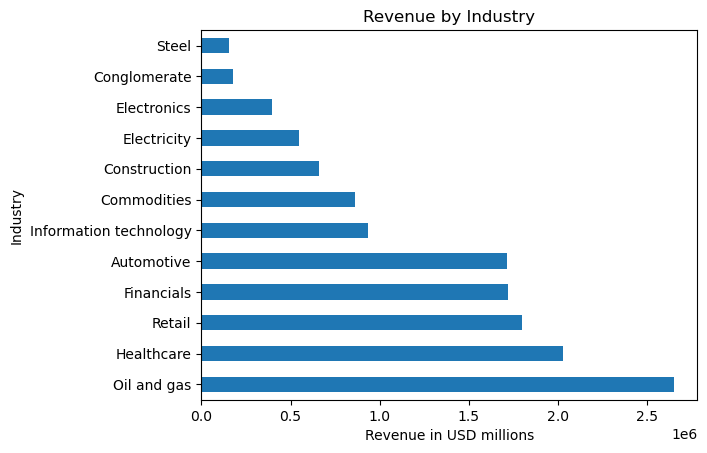

In [23]:
revenue_by_industry.plot(kind='barh')
plt.xlabel('Revenue in USD millions')
plt.title('Revenue by Industry')
plt.show()

In [24]:
df.groupby('Headquarters')['Revenue in Millions'].sum().head(3)

Headquarters
China      3155454
France      218945
Germany     862725
Name: Revenue in Millions, dtype: int32

In [27]:
country_with_the_most_hq = df.groupby('Headquarters')['Headquarters'].count().sort_values(ascending=False)
country_with_the_most_hq

Headquarters
United States     23
China             12
Germany            4
Switzerland        2
United Kingdom     2
France             1
India              1
Japan              1
Netherlands        1
Saudi Arabia       1
Singapore          1
South Korea        1
Taiwan             1
Name: Headquarters, dtype: int64

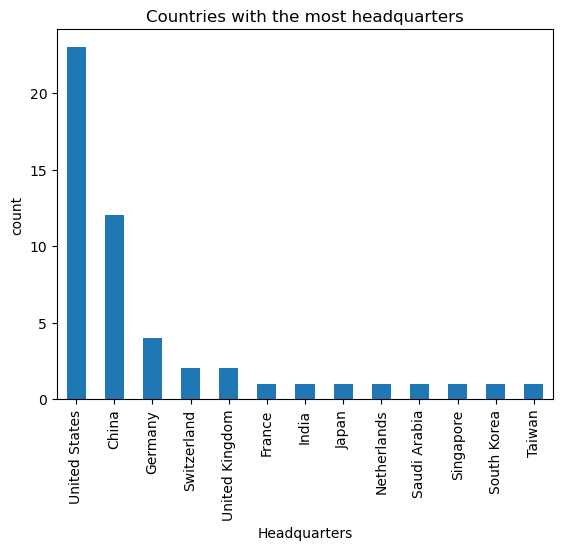

In [28]:
country_with_the_most_hq.plot(kind='bar')
plt.title('Countries with the most headquarters')
plt.ylabel('')
plt.show()


In [49]:
industry_with_the_most_employee = df.groupby('Industry')['Employees'].sum().head(3)

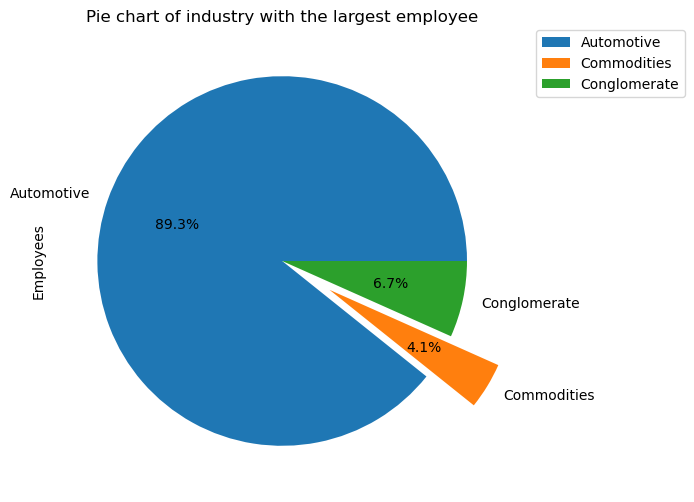

In [52]:
plt.figure(figsize=(10,6))
explode = (0, 0.3, 0.0)
industry_with_the_most_employee.plot(kind='pie', explode=explode, autopct = '%1.1f%%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Pie chart of industry with the largest employee')
plt.show()